    

# TODO: Training a facial detection model

 

-Download the Wiki dataset (https://drive.google.com/file/d/1zLF3xRBjEzMGAW0UXXCuz7zYLvdKw2cx/view?usp=drivesdk)


-Perform EDA and cleaning on the dataset


-Implement Faster-RCNN model using tf.keras


-Setup tensorboard with acc and loss plotting and tensorflow profiler to monitor training performance 


-Write a demo script to test the model on webcam

 

 

# Notes:


-This application should be divided into seperate modules/scripts (no notebooks) 


-Create a repo on github and push changes in the code with clear commit messages every step of the way 


-The model implementation shall be done using tf.keras and tensorflow >= 2.0

 
# CRISP-DM Methodology

In this section we overview our selected method for engineering our solution. CRISP-DM stands for Cross-Industry Standard Process for Data Mining. It is an open standard guide that describes common approaches that are used by data mining experts. CRISP-DM includes descriptions of the typical phases of a project, including tasks details and provides an overview of the data mining lifecycle. The lifecycle model consists of six phases with arrows indicating the most important and frequent dependencies between phases. The sequence of the phases is not strict. In fact, most projects move back and forth between phases as necessary. It starts with business understanding, and then moves to data understanding, data preparation, modelling, evaluation, and deployment. The CRISP-DM model is flexible and can be customized easily.

==>Our process to manage our project using the open standard CRISP-DM which will be more detailed in the rest of project phases.
 
# 1-Buissness Understanding
### 1-Tasks

    Determine business objectives
    Assess situation
    Determine data mining goals
    Produce project plan

### 2-Results


-Download the Wiki dataset (https://drive.google.com/file/d/1zLF3xRBjEzMGAW0UXXCuz7zYLvdKw2cx/view?usp=drivesdk)


-Perform EDA and cleaning on the dataset


-Implement Faster-RCNN model using tf.keras


-Setup tensorboard with acc and loss plotting and tensorflow profiler to monitor training performance 


-Write a demo script to test the model on webca
# 2-Data Understanding
### 1-Tasks

    Collect data
    Describe data
    Explore data
    Verify data quality
    
# Set up your environment & Import libraries and modules.

In [1]:
# Examine Version
# Load the TensorBoard notebook extension.
%load_ext tensorboard


In [2]:
from datetime import datetime
from packaging import version

import tensorflow as tf
from tensorflow import keras

import  os


import numpy as np

print("TensorFlow version: ", tf.__version__)
assert version.parse(tf.__version__).release[0] >= 2, \
    "This notebook requires TensorFlow 2.0 or above."


TensorFlow version:  2.2.0


In [3]:
import tensorflow_estimator
print(tensorflow_estimator.__file__) 

C:\Users\rzouga\Anaconda3\lib\site-packages\tensorflow_estimator\__init__.py


In [4]:
import pkg_resources

for entry_point in pkg_resources.iter_entry_points('tensorboard_plugins'):
    print(entry_point.dist)

tensorboard 2.2.2
tensorboard-plugin-wit 1.7.0


###  2-Load Data 

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from datetime import datetime
import pytz
import warnings
from tensorflow.keras.preprocessing.image import load_img, img_to_array

warnings.filterwarnings('ignore')



In [6]:

import pandas as pd
import scipy.io

import scipy.io
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

def convert_mat_tocsv(mat):

  
    instances = mat['wiki'][0][0][0].shape[1]
    columns = ["dob", "photo_taken", "full_path", "gender",\
                "name", "face_location", "face_score", "second_face_score"]
    df = pd.DataFrame(index = range(0,instances), columns = columns)

    for i in mat:
        if i == "wiki":
            current_array = mat[i][0][0]
            for j in range(len(current_array)):
                df[columns[j]] = pd.DataFrame(current_array[j][0])
    return df

wiki_mat = scipy.io.loadmat('C:/Users/rzouga/Downloads/Github/CNN_CV/Face_Recognition_Fast_rcnn/TrainFacialRecognitonModel/wiki_crop/wiki_crop/wiki.mat')
wiki_Pandas=convert_mat_tocsv(wiki_mat)
wiki_Pandas.head()

,dob,photo_taken,full_path,gender,name,face_location,face_score,second_face_score
0,723671,2009,[17/10000217_1981-05-05_2009.jpg],1.0,[Sami Jauhojärvi],"[[111.29109473290997, 111.29109473290997, 252....",4.300962,NaN
1,703186,1964,[48/10000548_1925-04-04_1964.jpg],1.0,[Dettmar Cramer],"[[252.48330229530742, 126.68165114765371, 354....",2.645639,1.949248
2,711677,2008,[12/100012_1948-07-03_2008.jpg],1.0,[Marc Okrand],"[[113.52, 169.83999999999997, 366.08, 422.4]]",4.329329,NaN
3,705061,1961,[65/10001965_1930-05-23_1961.jpg],1.0,[Aleksandar Matanović],"[[1, 1, 634, 440]]",-inf,NaN
4,720044,2012,[16/10002116_1971-05-31_2012.jpg],0.0,[Diana Damrau],"[[171.61031405173117, 75.57451239763239, 266.7...",3.408442,NaN


### 3-EDA
It’s always a good idea (and frankly, a mandatory step) to first explore the data we have. This helps us not only unearth hidden patterns, but gain a valuable overall insight into what we are working with.



#### 3-1 Data Insights

In [7]:
wiki_Pandas.shape

(62328, 8)

In [8]:
wiki_Pandas.face_location

0        [[111.29109473290997, 111.29109473290997, 252....
1        [[252.48330229530742, 126.68165114765371, 354....
2            [[113.52, 169.83999999999997, 366.08, 422.4]]
3                                       [[1, 1, 634, 440]]
4        [[171.61031405173117, 75.57451239763239, 266.7...
                               ...                        
62323    [[128.92773553879837, 128.92773553879837, 320....
62324                                   [[1, 1, 285, 440]]
62325    [[169.88839785556354, 74.31669471981023, 235.2...
62326                                       [[1, 1, 1, 1]]
62327    [[92.72633234774001, 62.04355489849334, 230.12...
Name: face_location, Length: 62328, dtype: object

In [9]:
wiki_Pandas.columns.values

array(['dob', 'photo_taken', 'full_path', 'gender', 'name',
       'face_location', 'face_score', 'second_face_score'], dtype=object)

**dob:** date of birth (Matlab serial date number)

**photo_taken:** year when the photo was taken

**full_path:** path to file

**gender:** 0 for female and 1 for male, NaN if unknown

**name:** name of the celebrity

**face_location:** location of the face. 

**img(face_location(2):face_location(4),face_location(1):face_location(3),:))
 [x y width height]**.

**face_score:** detector score (the higher the better). Inf implies that no face was found in the image and the face_location then just returns the entire image

**second_face_score:** detector score of the face with the second highest score. This is useful to ignore images with more than one face. second_face_score is NaN if no second face was detected.



In [10]:
wiki_Pandas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62328 entries, 0 to 62327
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dob                62328 non-null  int32  
 1   photo_taken        62328 non-null  uint16 
 2   full_path          62328 non-null  object 
 3   gender             59685 non-null  float64
 4   name               62328 non-null  object 
 5   face_location      62328 non-null  object 
 6   face_score         62328 non-null  float64
 7   second_face_score  4096 non-null   float64
dtypes: float64(3), int32(1), object(3), uint16(1)
memory usage: 3.2+ MB


#### 3-3 Summary Statistics

In [11]:
wiki_Pandas.describe()

,dob,photo_taken,gender,face_score,second_face_score
count,62328.000000,62328.000000,59685.000000,6.232800e+04,4096.000000
mean,716681.030035,1998.765627,0.788523,-inf,2.009050
std,10832.627367,20.907937,0.408359,NaN,0.981277
min,4077.000000,1940.000000,0.000000,-inf,0.731419
25%,710673.000000,1992.750000,1.000000,-inf,1.164925
50%,719269.000000,2009.000000,1.000000,2.463949e+00,1.839065
75%,724702.250000,2012.000000,1.000000,3.760014e+00,2.655757
max,736011.000000,2015.000000,1.000000,7.081268e+00,5.463147


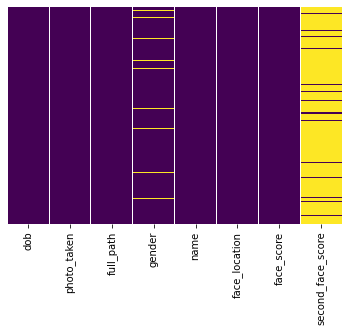

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.heatmap(wiki_Pandas.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

#### 3-4 Visualisation

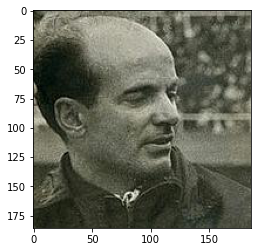

In [13]:
# reading single image using imread function of matplotlib
image_valid = plt.imread('C:/Users/rzouga/Downloads/Github/CNN_CV/Face_Recognition_Fast_rcnn/TrainFacialRecognitonModel/wiki_crop/wiki_crop/48/10000548_1925-04-04_1964.jpg')
plt.imshow(image_valid)

In [15]:
Image_valid=wiki_Pandas[wiki_Pandas['full_path'].str[0]=='16/10002116_1971-05-31_2012.jpg']
Image_valid

,dob,photo_taken,full_path,gender,name,face_location,face_score,second_face_score
4,720044,2012,[16/10002116_1971-05-31_2012.jpg],0.0,[Diana Damrau],"[[171.61031405173117, 75.57451239763239, 266.7...",3.408442,NaN


In [16]:
IV_notvalid=wiki_Pandas[wiki_Pandas['full_path'].str[0]=='00/2838400_1956-03-16_1970.jpg']
IV_notvalid

,dob,photo_taken,full_path,gender,name,face_location,face_score,second_face_score
23979,714490,1970,[00/2838400_1956-03-16_1970.jpg],1.0,[Jeff McDill],"[[1, 1, 1, 1]]",-inf,NaN


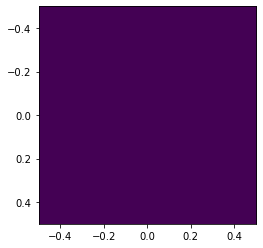

In [17]:

# reading single image using imread function of matplotlib
image_notvalid = plt.imread('C:/Users/rzouga/Downloads/Github/CNN_CV/Face_Recognition_Fast_rcnn/TrainFacialRecognitonModel/wiki_crop/wiki_crop/00/2838400_1956-03-16_1970.jpg')
plt.imshow(image_notvalid)

# 3- Data Preparation
### 3-1 Tasks

    Data selection

    Data preprocessing

### 3-2 Steps:

    Data cleaning

    Data integration

    Data sampling

    Data dimensionality reduction

    Data formatting

    Data transformation
    
    Scaling

    Aggregation

    Decomposition


### Data cleaning
Some pictures don’t include people in the wiki data set. For example, a vase picture exists in the data set. Moreover, some pictures might include two person. Furthermore, some are taken distant. Face score value can help us to understand the picture is clear or not. They all might confuse the model. We should ignore them. Finally, unnecessary columns should be dropped to occupy less memory

In [64]:
#remove pictures does not include face
wiki_Pandas = wiki_Pandas[wiki_Pandas['face_score'] != -np.inf]
 
#some pictures include more than one face, remove them
wiki_Pandas = wiki_Pandas[wiki_Pandas['second_face_score'].isna()]
 
#check threshold
wiki_Pandas = wiki_Pandas[wiki_Pandas['face_score'] >= 3.5]
wiki_Pandas.shape

(17106, 8)

#### Select
-full_path: path to file

-face_location: location of the face.

[x y width height]

-face_score: detector score (the higher the better). Inf implies that no face was found in the image and the face_location then just returns the entire image


In [65]:
wiki_Selected =wiki_Pandas[ ['full_path', 'face_location', 'face_score']]
wiki_Selected.head(3)

,full_path,face_location,face_score
0,[17/10000217_1981-05-05_2009.jpg],"[[111.29109473290997, 111.29109473290997, 252....",4.300962
2,[12/100012_1948-07-03_2008.jpg],"[[113.52, 169.83999999999997, 366.08, 422.4]]",4.329329
5,[02/10002702_1960-11-09_2012.jpg],"[[274.76563240288175, 57.7700900839337, 376.88...",4.748056


In [ ]:
If I ihave understood your problem correctly, here's the solution.
The position of the box object has been given in the scale of [0,1] and so if you scale up the image or even scale down, the given xmin, ymin, xmax, ymax needs to be scaled to the appropriate dimension. Where x coordinates needs to be multiplied by the width and the y coordinates needs to be multiplied by the height. So your coordinates will be as follows:

Image size (1024, 1000) -> Annotations(256,200,768,750)
Image size (512, 500) -> Annotations(128,125,384,375)
Image size (512, 512) -> Annotations(128,128,384,384)

The Annotations are in the following order (Xmin, Ymin, Xmax, Ymax)

### Transform

In [66]:
import collections


def flatten(x):
    if isinstance(x, collections.Iterable):
        return [int(a) for i in x for a in flatten(i)]
    else:
        return [x]
wiki_Selected['box1']=wiki_Selected['face_location'].apply(flatten)

wiki_Selected[['Xmin', 'Ymin', 'Xmax', 'Ymax']] = pd.DataFrame(wiki_Selected.box1.tolist(), index= wiki_Selected.index)
wiki_Selected1=wiki_Selected[['full_path', 'Xmin',
       'Ymin', 'Xmax', 'Ymax']]
wiki_Selected1.head(10)

,full_path,Xmin,Ymin,Xmax,Ymax
0,[17/10000217_1981-05-05_2009.jpg],111,111,252,252
2,[12/100012_1948-07-03_2008.jpg],113,169,366,422
5,[02/10002702_1960-11-09_2012.jpg],274,57,376,159
6,[41/10003541_1937-09-27_1971.jpg],79,26,197,144
10,[99/10004299_1908-08-19_1950.jpg],107,107,298,298
11,[56/1000456_1933-06-12_1969.jpg],240,71,366,197
12,[82/10004882_1987-05-16_2010.jpg],75,96,122,143
15,[47/10005947_1981-04-07_2006.jpg],113,141,366,394
19,[81/1000781_1930-07-07_2008.jpg],126,28,251,153
21,[97/100097_1968-03-23_2010.jpg],87,74,197,185


346 346


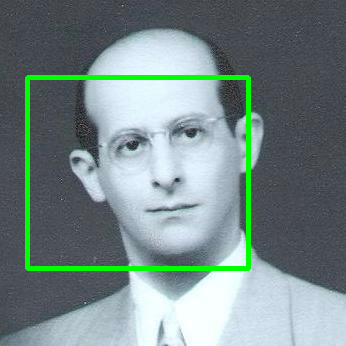

In [81]:
import cv2
import pandas as pd
from PIL import Image
def draw_boxes(image_name):
    selected_value = wiki_Selected1[wiki_Selected1.full_path == image_name]
   
   
    
    img = cv2.imread('C:/Users/rzouga/Downloads/Github/CNN_CV/Face_Recognition_Fast_rcnn/TrainFacialRecognitonModel/wiki_crop/wiki_crop/{}'.format(image_name))
    img_h, img_w, _ = np.shape(img) 
   
    
    print( img_h, img_w)
    for index, row in selected_value.iterrows():
        width = row['Xmax']- row['Xmin']
        height = row['Ymax'] - row['Ymin']
        img = cv2.rectangle(img, (row['Xmin']-80, row['Ymin']-30), ( row['Xmax']-50 ,row['Ymax']-30), (0, 255, 0), 3)
    return img
Image.fromarray(draw_boxes('99/10004299_1908-08-19_1950.jpg'))

#### Creating full path for each image 

In [90]:

def creatingPath(x):
    return ("C:/Users/rzouga/Downloads/Github/CNN_CV/Face_Recognition_Fast_rcnn/TrainFacialRecognitonModel/wiki_crop/wiki_crop/"+x)

wiki_Selected1["path"] =wiki_Selected1["full_path"].str[0].apply(creatingPath)
wiki_Selected1["path"][0]

'C:/Users/rzouga/Downloads/Github/CNN_CV/Face_Recognition_Fast_rcnn/TrainFacialRecognitonModel/wiki_crop/wiki_crop/17/10000217_1981-05-05_2009.jpg'